# How to Completely Master Figure And Axes Objects in Matplotlib (Finally)
## Use Matplotlib with ease and style
![](images/pexels.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@ilargian-faus-763704?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Ilargian Faus</a>
        on 
        <a href='https://www.pexels.com/photo/close-up-photo-of-dog-wearing-sunglasses-1629781/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels.</a> All images are by the author unless specified otherwise.
    </strong>
</figcaption>

# Setup

In [3]:
import logging
import time
import warnings

import catboost as cb
import datatable as dt
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import *
from sklearn.datasets import *
from sklearn.impute import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import *

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore")
pd.set_option("float_format", "{:.5f}".format)

In [2]:
X, y = make_classification()

# Motivation

# Matplotlib was created by artists

Though it *is* true that Matplotlib was written by exceptional programmers, it is made up of base classes called Artists. Every single thing you see on a plot is a class that *inherits* from the base `Artist` class:

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png)
<figcaption style="text-align: center;">
    <strong>
        Matplotlib anatomy from the docs.
    </strong>
</figcaption>

Every circle-annotated component of the plot is implemented as a separate class that inherits from the base artist. But this ability of representing everything as a class has its pros and cons. 

On the one hand, it gives Matplotlib unprecedented flexibility. Using their respective class, you can tweak virtually any plot component until you are satisfied. Often, you have multiple options to do the same task, enabling you to switch between different interfaces.

Perhaps, this is what upsets Pythonistas about MPL the most. According to the [zen of Python](https://www.python.org/dev/peps/pep-0020/), there should be one, and preferably only one obvious way to do something. And Matplotlib API is a violation of this rule in every way imaginable.

As a result, beginners are confused. They don't know which class or function to use to do a simple task. They don't understand the documentation because, frankly, it is so damn hard to understand. Even experienced developers don't have a clue what errors like below mean:

```python
>>> plt.plot([1, 2, 3], [2, 6, 4], s=4)

...
AttributeError: 'Line2D' object has no property 's'
```

Naturally, you are frustrated because you don't know where the heck you used Lined2D object or where it came from.

If you are one of these people, I will show you a few tricks that I have learned which will make you a pro Matplotlib user and read the documentation like you would read children's bedtime story.

# Creating a unified workflow of your own

We will start by choosing a unified approach to doing tasks. As I said, there are many ways to do a single one, so it is important to stick to only one style and master it. 

The workflow I use to create a plot and customize it is as follows:
1. Create the plot itself with basic elements and low customization.
2. Find out weaknesses of the plot and make note of the components I want to improve.
3. Isolate those weak components with relevant Matplotlib functions.
4. Tweak them until I am satisfied using the swiss army knife of Matplotlib (more on that later).
5. Save or display it.

We will learn how to do each step in detail. I guarantee you that this framework works for almost any type of plot you create and customization you want to make. 

# Figuratively speaking...

Let's start by learning how to create plots using figures. A Figure object in MPL is the highest-level artist, which can be thought as the canvas you draw everything on.

In [5]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

A figure with noting drawn on it can be created with the `figure` function. On its own, figure does nothing - just remember that it is the blank white page you draw your plots on.

We will come back to figures later.

# Let's throw Axes!

The fun begins when we add axes to the figure. The `Axes` class is an artist that represents a set of x, y coordinate system in a plot:

In [10]:
fig = plt.figure()

ax1 = fig.add_axes()
ax1

<Figure size 432x288 with 0 Axes>

The function to add a blank axes to a figure is `add_axes` but in practice, you never use it. Instead, you usually create a single figure and an axes simultaneously using the `subplots` function:

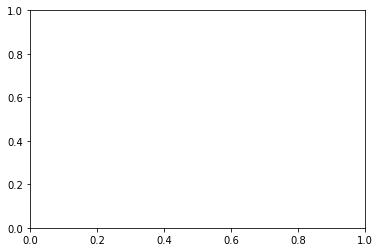

In [11]:
fig, ax = plt.subplots()

This immediately creates a figure and attaches an axes (coordinate system) with a range 0 and 1. Next, we start plotting data on the axes using the plotting methods of axes. 

These plots have names such as `bar`, `hist`, `scatter`, `boxplot`, etc. Let's create a simple scatterplot:

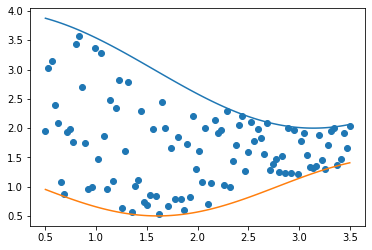

In [23]:
fig, ax = plt.subplots()

# Create the data to plot
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

datapoints = ax.scatter(X, Y3)
line1 = ax.plot(X, Y1)
line2 = ax.plot(X, Y2)

We can already see that the plot needs a few text labels. Besides, we don't like the default colors of the points and the lines. Also, figure itself is a bit small.

See what we did here? We first created a base plot and identified the components we want to improve. Now, we need to figure out how to extract those components and tweak them.

# Containers and primitives

# Summary